# 5.1 데이터셋 설명

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,
               10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
               8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,
               6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
               4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


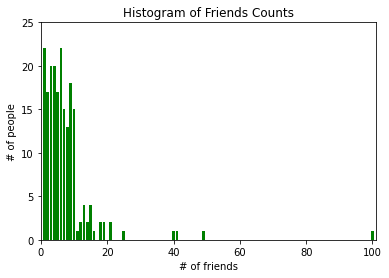

In [5]:
friend_counts=Counter(num_friends)
xs=range(101)
ys=[friend_counts[x] for x in xs]

plt.bar(xs,ys,color='green')
plt.axis([0,101,0,25])
plt.title("Histogram of Friends Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [8]:
nu_points=len(num_friends)
largest_val=max(num_friends)
smallest_val=min(num_friends)
print('larg',largest_val)
print('small',smallest_val)

sorted_val=sorted(num_friends)
smallest_val=sorted_val[0]
seclarg_val=sorted_val[-2]
largest_val=sorted_val[-1]
print('larg',largest_val)
print('small',smallest_val)
print('seclarg',seclarg_val)

larg 100
small 1
larg 100
small 1
seclarg 49


# 5.1.1 중심 경향성

In [11]:
from typing import List

def mean(xs: List[float])->float: # 평균값
    return sum(xs)/len(xs)

mean(num_friends)

7.333333333333333

In [16]:
def _median_odd(xs:List[float])->float: # 중앙값
    return sorted(xs)[len(xs)//2]

def _median_even(xs:List[float])->float:
    sorted_xs=sorted(xs)
    mid_point=len(xs)//2
    return (sorted_xs[mid_point-1]+sorted_xs[mid_point])/2

def median(v: List[float])->float:
    return _median_even(v) if len(v)%2==0 else _median_odd(v)

In [17]:
print(median([1,9,2,10]))

print(median(num_friends))

5.5
6.0


In [20]:
def quantile(xs: List[float],p:float)->float: # 분기
    p_index=int(p*len(xs))
    return sorted(xs)[p_index]

print(quantile(num_friends,0.1))
print(quantile(num_friends,0.25))
print(quantile(num_friends,0.75))
print(quantile(num_friends,0.9))

1
3
9
13


In [22]:
def mode(xs:List[float])->List[float]:#최빈값
    counts=Counter(xs)
    max_count=max(counts.values())
    return [x_i for x_i,count in counts.items() if count==max_count]

print(set(mode(num_friends)))

{1, 6}


# 5.1.2 산포도

In [23]:
def data_range(xs:List[float])->float:#산포도
    return max(xs)-min(xs)
print(data_range(num_friends))

99


In [41]:
import math

def dot(v, w):
    return sum(v_i * w_i
              for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    return dot(v, v)
def de_mean(xs:List[float])->List[float]: # 편차
    y=mean(xs)
    return[x-y for x in xs]
#print(de_mean(num_friends))

In [43]:
def variance(xs:List[float])->float: #분산
    n=len(xs)
    deviations=de_mean(xs)
    return sum_of_squares(deviations)/(n-1)
print(variance(num_friends))

81.54351395730716


In [47]:
def standard_deviation(xs:List[float])->float:#표준편차
    return math.sqrt(variance(xs))
print(standard_deviation(num_friends))

9.03014473623248


In [38]:
def interquartile_range(xs:List[float])->float: #분기 차이
    return quantile(xs,0.75)-quantile(xs,0.25)

print(interquartile_range(num_friends))

6


# 5.2 상관관계

In [44]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,
                 27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,
                 36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,
                 19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,
                 36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,
                 44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,
                 34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,
                 14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,
                 29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,
                 18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,
                 26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,
                 27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,
                 31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,
                 9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [46]:
def covariance(xs:List[float],ys:List[float])->float: #공분산
    return dot(de_mean(xs),de_mean(ys))/(len(xs)-1)
print(covariance(num_friends,daily_minutes))

22.425435139573064


In [49]:
def correlation(xs:List[float],ys:List[float])->float:
    stdev_x=standard_deviation(xs)
    stdev_y=standard_deviation(ys)
    if(stdev_x>0 and stdev_y>0):
        return covariance(xs,ys)/stdev_x/stdev_y
    else:
        return 0

print(correlation(num_friends,daily_minutes))

0.24736957366478218


In [50]:
outlier=num_friends.index(100) # 이상치
num_friends_good=[x for i,x in enumerate(num_friends) if i!=outlier]
daily_minutes_good=[x for i,x in enumerate(daily_minutes) if i!=outlier]
daily_hours_good=[dm/60 for dm in daily_minutes_good]

print(correlation(num_friends_good,daily_minutes_good))
print(correlation(num_friends_good,daily_hours_good))

0.5736792115665573
0.5736792115665579


# 5.3 심슨의 역설

혼재변수가 누락되 잘못된 상관관계

# 5.4 상관관계에 대한 추가적인 경고사항

상관관계가 0이라는 것은 선형적인 관계가 없다는 것과 다른 종류의 관계가 존재할 수 있다는 뜻

# 5.5 상관관계와 인과관계

 인과관계 확인은 무작위로 데이터 포인트를 선택해서 확인하는 방법이 있다.